# First, Go Through This Problem

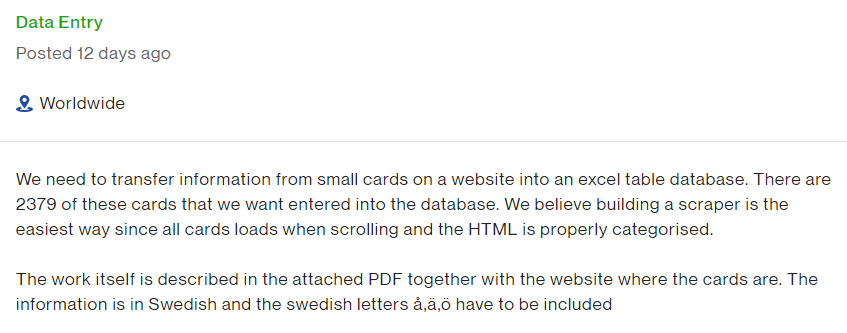

# Image of the PDF

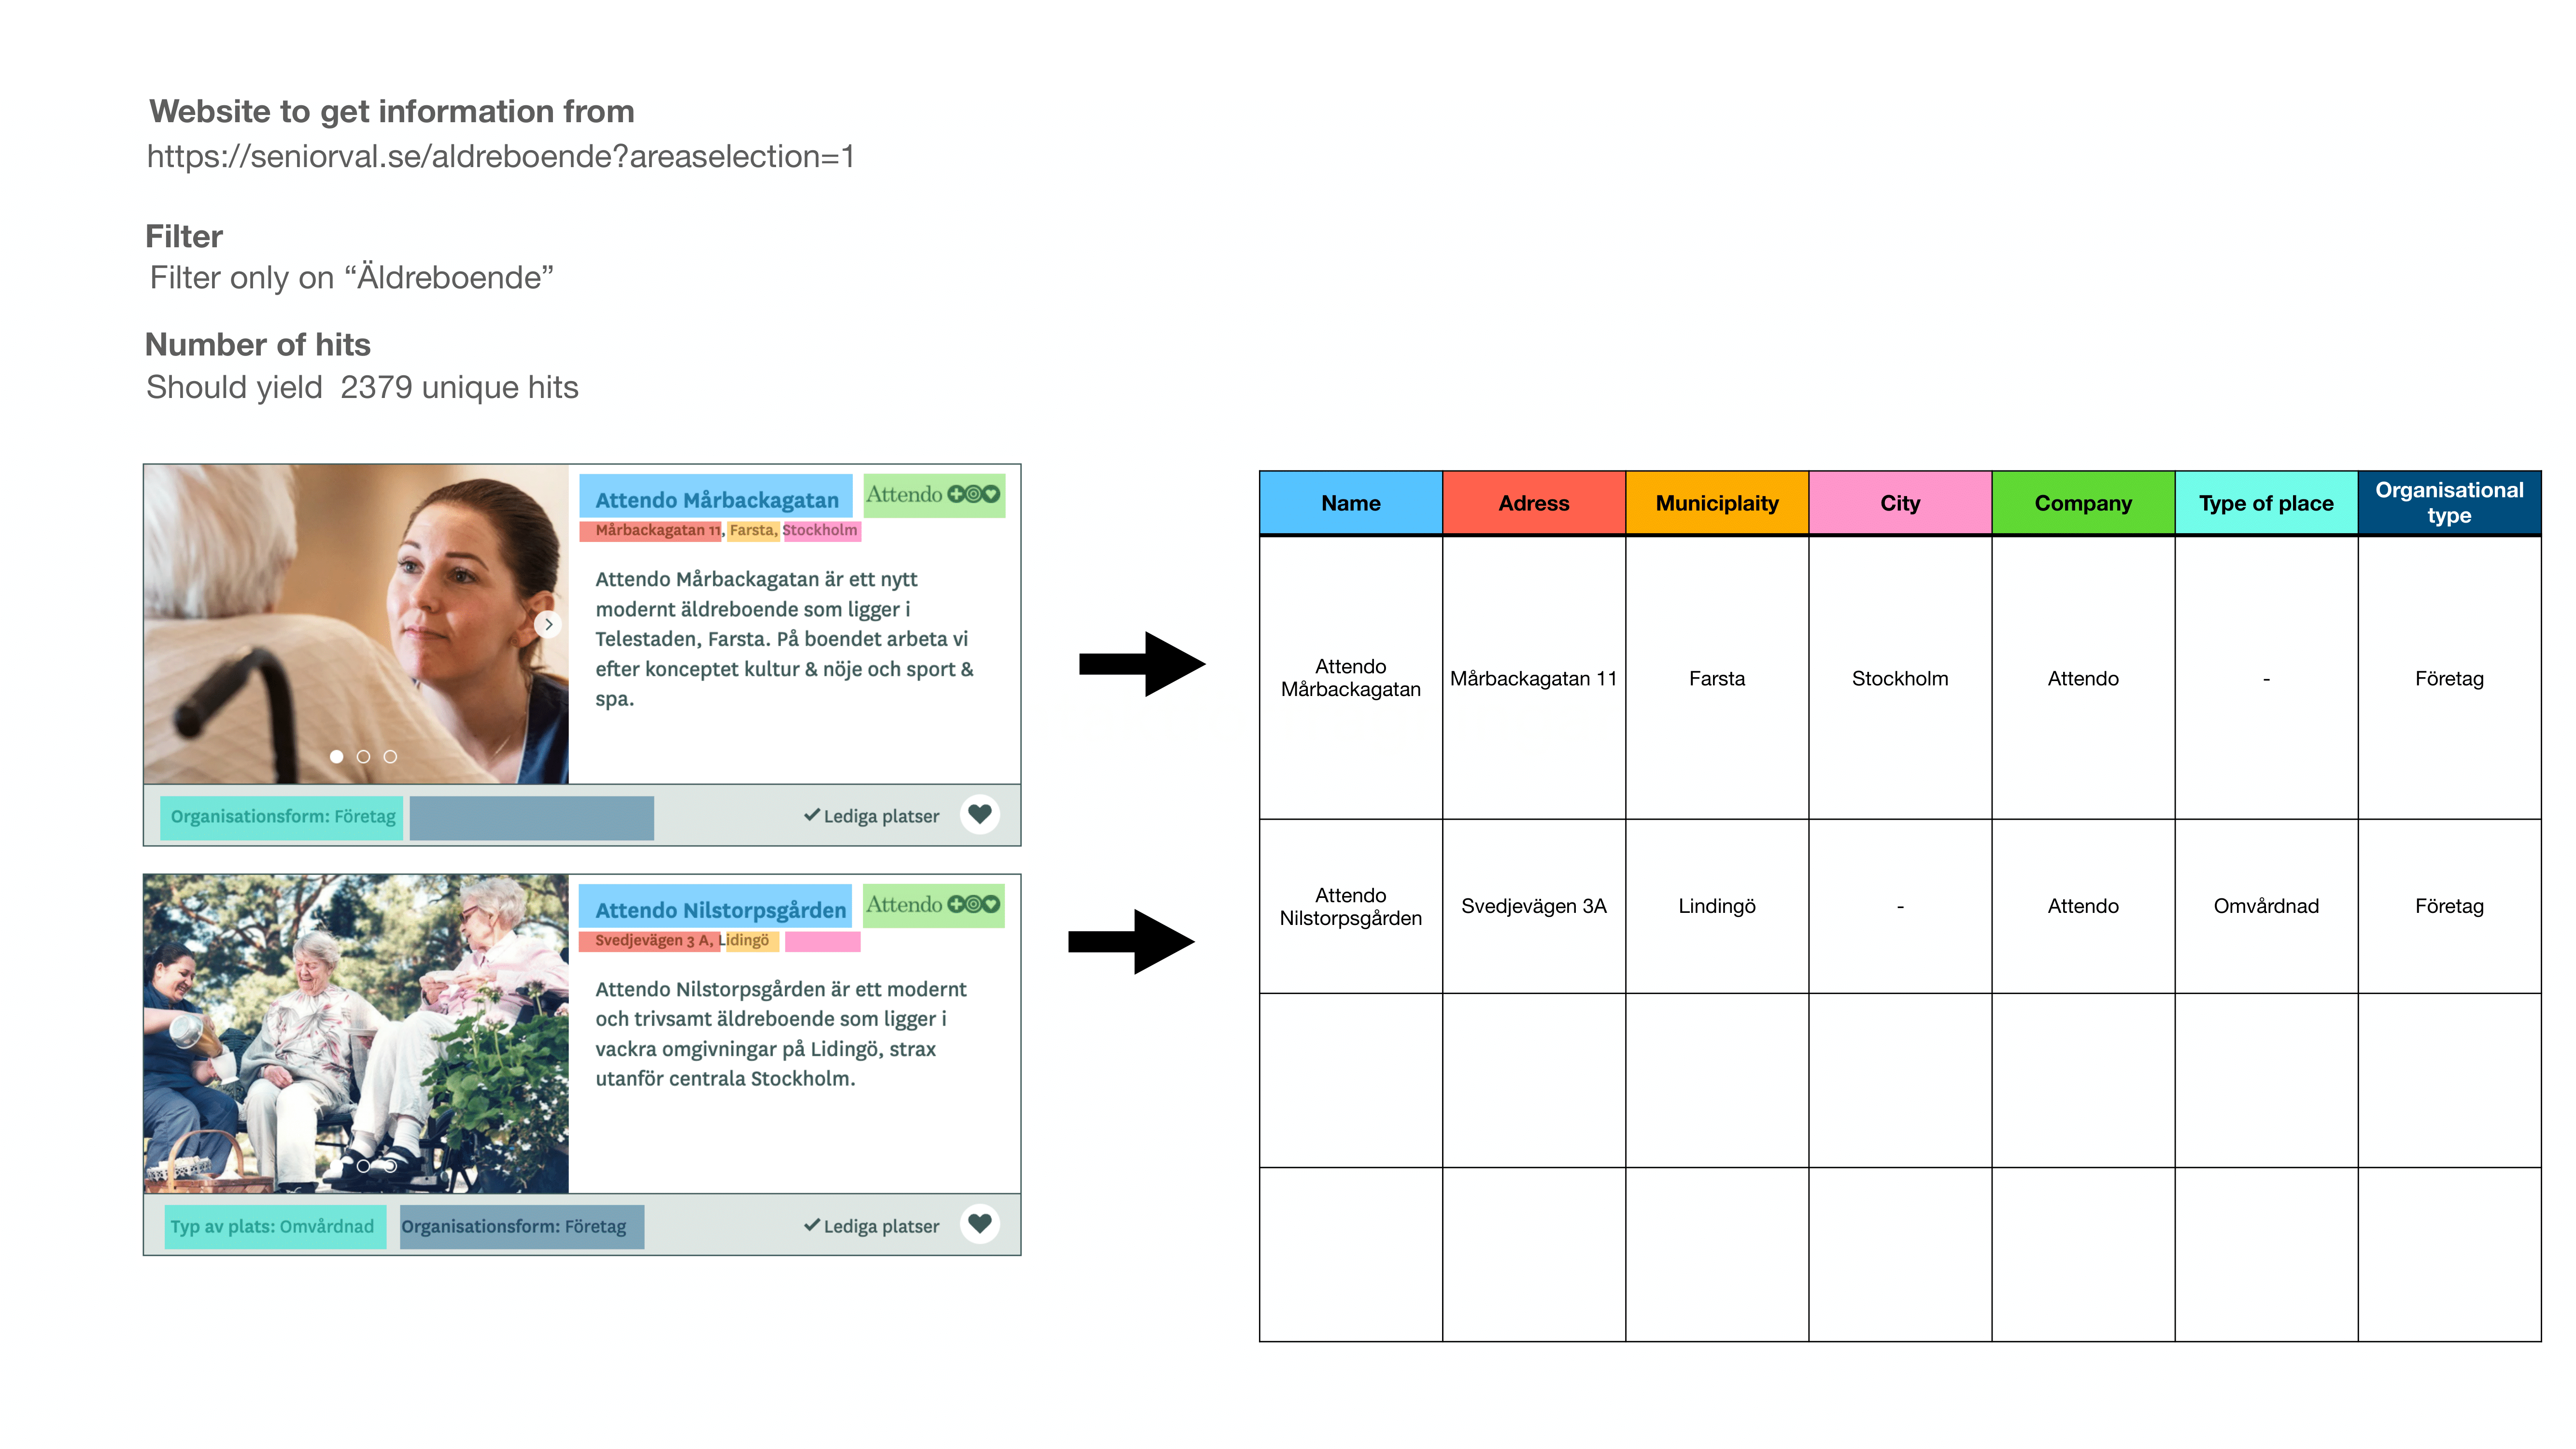

# My Solution

In [1]:
def all_2379():
    
    import requests
    
    import bs4
    
    a_list = []
    
    column_names = ['Name', 'Address', 'Municipality', 'City', 'Company', 'Type of Place', 'Organisational Type']
    
    a_list.append(column_names)
    
    for i in range (1, 49):
        
        the_link = 'https://seniorval.se/aldreboende?areaselection=1&p={}'.format(i)
        
        rqst = requests.get(the_link)
    
        soup = bs4.BeautifulSoup(rqst.text, 'lxml')
        
        str_soup = str(soup)
        
        with_images = ' node node-health-care-social-housing node-teaser carefinder-object carefinder-object--level-2 carefinder-object--teaser'
        
        no_images = ' node node-health-care-social-housing node-teaser carefinder-object carefinder-object--level-1 carefinder-object--teaser carefinder-object--image-missing'
    
        with_images_clean = 'node node-health-care-social-housing node-teaser carefinder-object carefinder-object--level-2 carefinder-object--teaser'
        
        if with_images_clean in str_soup:
            
            class_item = with_images.replace(" ", ".")
        
        else:
            
            class_item = no_images.replace(" ", ".")
        
        cards = soup.select(class_item)
    
        cards_footer = soup.select('.carefinder-object__footer')
        
        j = 0
        
        for one_card in cards:
            
            # get the specific company name

            s_name = one_card.select('h2')[0].getText()

            # get the full address

            address_card = soup.select('.carefinder-object__address')

            address = address_card[j].getText().split(", ")


            tiny_list = address

            if len(tiny_list) == 3:

                the_address, the_municipality, the_city = tiny_list

            elif len(tiny_list) == 2:

                the_address, the_municipality =  tiny_list
                the_city = '-'


            # get the company name

            comp_name = s_name.split()[0]



            # get the type of place and organisational type
            
            tap = 'Typ av plats'
            
            orgf = 'Organisationsform'
            
            
            other_soup = soup.select('.carefinder-object__footer-container')
            
            str_osoup = str(other_soup[j])

            

            if tap not in str_osoup:
                tp = '-'
                
            if tap in str_osoup:
                tp = other_soup[j]('p')[0].getText().replace(" ", "").replace("\n", "")
            
            if orgf in str_osoup:
                    
                if len(other_soup[j]('p')) == 1:
                    org2 = other_soup[j]('p')[0].getText().replace(" ", "").replace("\n", "")
                    
                elif len(other_soup[j]('p')) == 2:
                    org2 = other_soup[j]('p')[0].getText().replace(" ", "").replace("\n", "")
        
                else:
                    org2 = '-'
            
            
            any_entry = [s_name, the_address, the_municipality, the_city, comp_name, tp, org2]

            a_list.append(any_entry)
            
            j += 1
        

    return a_list

## Making a List from the Function (Based on Return Type)

In [2]:
all_em = all_2379()

## Checking Length of List to See if It Matches

In [3]:
len(all_em)

2352

### Doesn't match, but that was the best I could have done

## Random Record

In [4]:
all_em[1504]

['Oxbackshemmet',
 'Oxbacksgatan 15-19',
 'Södertälje',
 '-',
 'Oxbackshemmet',
 '-',
 'Kommunal']

# Now, Making Everything into a CSV File

In [5]:
import csv

swedish_csv = open('seniorvalse.csv', mode = 'w', encoding = 'utf-8', newline = '')

csv_writer = csv.writer(swedish_csv, delimiter = ',')

csv_writer.writerows(all_em)

swedish_csv.close()